# Data Science Project


**College/University Name**: _CICCC - Cornerstone International Community College of Canada_  
**Course**: _Machine Learning_  
**Instructor**: _Austin Egbal_  
**Student Name**: _Amir Lima Oliveira_  
**Submission Date**: _2025-08-dd_  

---

### Project Title
    _Housing Proces Competition for Kaggle Learn Users_
---

#### Objective
* Build an end-to-end pipeline with:
    - EDA (Exploratory Data Analysis)
    - Processing
    - Modeling
    - Evaluation
    - Conclusion
---

#### Dataset Overview
- **Source:** [[Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/competitions/home-data-for-ml-course/data)]
- **Description:** Dataset of Ames housing with 80 features including property size, quality, location, and amenities to predict final sale price in dollars (target variable).
- **Credits:** DanB. Housing Prices Competition for Kaggle Learn Users. https://kaggle.com/competitions/home-data-for-ml-course, 2018. Kaggle.

---

## Table of Contents
### 1. [Import Libraries](#import-libraries)  


In [94]:
import os
import zipfile
# Packages for data manipulation
import pandas as pd
import numpy as np

# Packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# APIs for data access
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

# Packages for machine learning
import sklearn as sk

# Packages for data preprocessing
from sklearn.preprocessing import  RobustScaler, LabelEncoder

# Data splitting, model training, evaluation
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# ML Algorithms
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, SGDClassifier

# Data Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import cross_val_score



### 2. [Load & Inspect Data](#load--inspect-data)

In [95]:
# Authenticate and download dataset from Kaggle
api = KaggleApi()
api.authenticate()

# Create a directory to store the dataset
os.makedirs('./data', exist_ok=True)
extract_to = './data'
zip_path = './data/home-data-for-ml-course.zip'

# Download the dataset from Kaggle
kaggle.api.competition_download_files('home-data-for-ml-course', path='./data')

# Extract the downloaded zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)
    
# Load the dataset
df = pd.read_csv('./data/train.csv')

   - [Shape](#shape)

In [96]:
df.shape

(1460, 81)

In [97]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [98]:
df.value_counts()

Series([], Name: count, dtype: int64)

   - [Missing Values](#missing-values) <code> I'll handle those at topic __5.Feature Engineering__ </code>

In [99]:
df.isnull().sum().sort_values(ascending=False).head(20)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
Id                 0
dtype: int64

   - [Data Types](#data-types) 

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

   - [Preview Data](#preview-data)

In [101]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


---

### 3. [Data Cleaning](#data-cleaning)

   - [Drop Duplicates](#drop-duplicates)

In [102]:
# Any duplicate rows were finded in the dataset
df[df.duplicated()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


   - [Standardize Text and Formats](#standardize-text-and-formats)
      - <code> No need for text and format standardization such as Lowercasing / Uppercasing, Trimming whitespace, Removing special characters or Handling encoding issues </code>

   - [Convert Data Types](#convert-data-types)
      - <code> No need for convertions </code>

---

### 4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)

   - [Distribution of Variables](#distribution-of-variables)

In [103]:
categorical_features = df.select_dtypes(include=['object'])
numerical_features = df.select_dtypes(include=['int64', 'float64'])

categorical_features.shape, numerical_features.shape

((1460, 43), (1460, 38))

   - [Correlation Analysis](#correlation-analysis)

<Axes: >

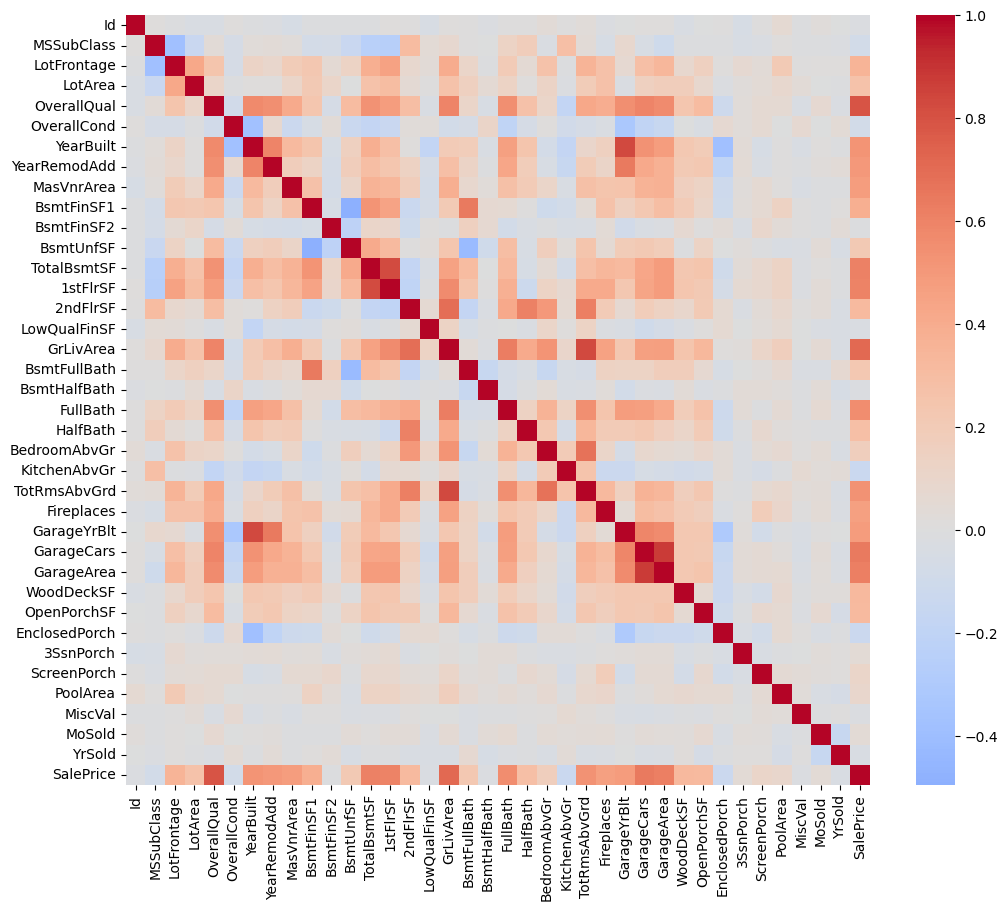

In [104]:
# Checking correlation between numerical features
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0)

In [105]:
top_corr = df.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)[1:20]
print("High Correlated Features:\n\n", top_corr)

High Correlated Features:

 OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Fireplaces      0.466929
BsmtFinSF1      0.386420
LotFrontage     0.351799
WoodDeckSF      0.324413
2ndFlrSF        0.319334
OpenPorchSF     0.315856
HalfBath        0.284108
Name: SalePrice, dtype: float64


In [106]:
category_means = {}
for col in categorical_features.columns:
    category_means[col] = df.groupby(col)['SalePrice'].mean().sort_values(ascending=False)
    print(category_means[col].head(10))

MSZoning
FV         214014.061538
RL         191004.994787
RH         131558.375000
RM         126316.830275
C (all)     74528.000000
Name: SalePrice, dtype: float64
Street
Pave    181130.538514
Grvl    130190.500000
Name: SalePrice, dtype: float64
Alley
Pave    168000.585366
Grvl    122219.080000
Name: SalePrice, dtype: float64
LotShape
IR2    239833.365854
IR3    216036.500000
IR1    206101.665289
Reg    164754.818378
Name: SalePrice, dtype: float64
LandContour
HLS    231533.940000
Low    203661.111111
Lvl    180183.746758
Bnk    143104.079365
Name: SalePrice, dtype: float64
Utilities
AllPub    180950.95682
NoSeWa    137500.00000
Name: SalePrice, dtype: float64
LotConfig
CulDSac    223854.617021
FR3        208475.000000
Corner     181623.425856
FR2        177934.574468
Inside     176938.047529
Name: SalePrice, dtype: float64
LandSlope
Sev    204379.230769
Mod    196734.138462
Gtl    179956.799566
Name: SalePrice, dtype: float64
Neighborhood
NoRidge    335295.317073
NridgHt    316270.

   - [Outlier Detection](#outlier-detection)

In [107]:
for col in df.select_dtypes(include=['number']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_outliers = Q1 - 1.5 * IQR
    upper_outliers = Q3 + 1.5 * IQR

    outliers = df[(df[col] < low_outliers) | (df[col] > upper_outliers)]

    print(f"Column: {col}, Outliers: {len(outliers)}")


Column: Id, Outliers: 0
Column: MSSubClass, Outliers: 103
Column: LotFrontage, Outliers: 88
Column: LotArea, Outliers: 69
Column: OverallQual, Outliers: 2
Column: OverallCond, Outliers: 125
Column: YearBuilt, Outliers: 7
Column: YearRemodAdd, Outliers: 0
Column: MasVnrArea, Outliers: 96
Column: BsmtFinSF1, Outliers: 7
Column: BsmtFinSF2, Outliers: 167
Column: BsmtUnfSF, Outliers: 29
Column: TotalBsmtSF, Outliers: 61
Column: 1stFlrSF, Outliers: 20
Column: 2ndFlrSF, Outliers: 2
Column: LowQualFinSF, Outliers: 26
Column: GrLivArea, Outliers: 31
Column: BsmtFullBath, Outliers: 1
Column: BsmtHalfBath, Outliers: 82
Column: FullBath, Outliers: 0
Column: HalfBath, Outliers: 0
Column: BedroomAbvGr, Outliers: 35
Column: KitchenAbvGr, Outliers: 68
Column: TotRmsAbvGrd, Outliers: 30
Column: Fireplaces, Outliers: 5
Column: GarageYrBlt, Outliers: 0
Column: GarageCars, Outliers: 5
Column: GarageArea, Outliers: 21
Column: WoodDeckSF, Outliers: 32
Column: OpenPorchSF, Outliers: 77
Column: EnclosedPorch

   - [Initial Insights](#initial-insights)

<code> Later I'll handle all these outliers with Robust Scaler </code> 

---

### 5. [Feature Engineering](#feature-engineering)

   - [Handling Missing Data](#handling-missing-data)

In [108]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [109]:
df['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix', nan], dtype=object)

In [110]:
# 1. Fill absence indicators 
none_cols = ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu',
             'GarageType','GarageFinish','GarageQual','GarageCond',
             'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1',
             'BsmtFinType2','MasVnrType']
df[none_cols] = df[none_cols].fillna('None')

# 2. LotFrontage: fill missing values with median by neighborhood
lotfrontage_median = df.groupby('Neighborhood')['LotFrontage'].transform('median')
df['LotFrontage'] = df['LotFrontage'].fillna(lotfrontage_median)

# 3. GarageYrBlt: fill with median year
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

# 4. MasVnrArea: fill with 0
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

# 5. Electrical: fill with mode
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

<code> In order to don't miss any value, I decided to fill it with __"None"__ for the houses that doesn't have some housing features details, such as basement, pool, garage and so on.</code>

<code> Also for the __"Linear feet of street connected to property"__ and __Year garage was built__,  miss values, I filled it with the __median__</code>

<code> For the __Masonry veneer area in square feet__ The best option, based on the column describe, is to fill the missing values with "0". (Most of the houses doesn't have masonry veneer). </code>

<code> The __"Eletrical feature"__ is categorical, so based on it, I used the __"mode"__ to fill the missing data.</code>

   - [Encoding Categorical Variables](#encoding-categorical-variables)

In [111]:
label_encoder = LabelEncoder()
# Encode categorical features
for col in categorical_features.columns:
    df[col] = label_encoder.fit_transform(df[col].astype(str))

# Checking if label encoding was successful
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,1,3,3,0,...,0,3,4,1,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,1,3,3,0,...,0,3,4,1,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,1,0,3,0,...,0,3,4,1,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,3,4,1,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,1,0,3,0,...,0,3,4,1,0,12,2008,8,4,250000


   - [Feature Transformation (Scaling, Normalization)](#feature-transformation-scaling-normalization)

In [112]:
scaler = RobustScaler()
scaled_array = scaler.fit_transform(df.select_dtypes(include=['int64', 'float64'])) 

df_scaled = pd.DataFrame(scaled_array, columns=df.select_dtypes(include=['int64', 'float64']).columns)
df_scaled

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,-1.000000,0.2,-0.25,-0.254076,0.5,0.0,0.652174,0.243243,1.193303,0.452790,...,0.000000,0.529412,0.0,0.0,0.0,0.0,0.0,-1.333333,0.0,0.541506
1,-0.998629,-0.6,0.50,0.030015,0.0,3.0,0.065217,-0.486486,0.000000,0.834679,...,1.773810,-0.367647,0.0,0.0,0.0,0.0,0.0,-0.333333,-0.5,0.220173
2,-0.997258,0.2,-0.10,0.437624,0.5,0.0,0.608696,0.216216,0.986301,0.143910,...,0.000000,0.250000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.720024
3,-0.995888,0.4,-0.50,0.017663,0.5,0.0,-1.260870,-0.648649,0.000000,-0.235170,...,0.000000,0.147059,272.0,0.0,0.0,0.0,0.0,-1.333333,-1.0,-0.273728
4,-0.994517,0.2,0.70,1.181201,1.0,0.0,0.586957,0.162162,2.130898,0.381186,...,1.142857,0.867647,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,1.035406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.994517,0.2,-0.40,-0.385746,0.0,0.0,0.565217,0.162162,0.000000,-0.538435,...,0.000000,0.220588,0.0,0.0,0.0,0.0,0.0,0.666667,-0.5,0.142815
1456,0.995888,-0.6,0.75,0.913167,0.0,1.0,0.108696,-0.162162,0.724505,0.570727,...,2.077381,-0.367647,0.0,0.0,0.0,0.0,0.0,-1.333333,1.0,0.559357
1457,0.997258,0.4,-0.20,-0.107831,0.5,4.0,-0.695652,0.324324,0.000000,-0.152334,...,0.000000,0.514706,0.0,0.0,0.0,0.0,2500.0,-0.333333,1.0,1.231776
1458,0.998629,-0.6,-0.10,0.058918,-0.5,1.0,-0.500000,0.054054,0.000000,-0.469638,...,2.178571,-0.367647,112.0,0.0,0.0,0.0,0.0,-0.666667,1.0,-0.248438


---

### 6. [Modeling / Statistical Analysis](#modeling--statistical-analysis)  

   - [Data train/test split](#Data-train-/-test-split)

In [113]:
random_state = 42
df2 = df.drop(columns=['Id', 'SalePrice'], inplace=False)
x = df2
y = df['SalePrice']

In [114]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=random_state)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1168, 79), (292, 79), (1168,), (292,))

   - [Model Selection & Training](#Model-Selection-&-Training)

In [123]:
ml_model = RandomForestRegressor(n_estimators=100, random_state=random_state)
ml_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [124]:
y_pred = ml_model.predict(X_test)

---

### 7. [Evaluation & Interpretation](#evaluation--interpretation)

In [125]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}, MSE: {mse}, R2: {r2}")

MAE: 17573.44684931507, MSE: 802503770.4172714, R2: 0.8953755357020772


In [126]:
cross_val_scores = cross_val_score(ml_model, x, y, cv=5, scoring='neg_mean_squared_error')
for actual, predicted in zip(y_test, y_pred):
    print(f"Original: {actual:.2f}, Predicted: {predicted:.2f}")

Original: 154500.00, Predicted: 140094.50
Original: 325000.00, Predicted: 325954.39
Original: 115000.00, Predicted: 118078.00
Original: 159000.00, Predicted: 165340.40
Original: 315500.00, Predicted: 324653.69
Original: 75500.00, Predicted: 86057.83
Original: 311500.00, Predicted: 208713.48
Original: 146000.00, Predicted: 151869.75
Original: 84500.00, Predicted: 84674.32
Original: 135500.00, Predicted: 130697.21
Original: 145000.00, Predicted: 151822.19
Original: 130000.00, Predicted: 120577.83
Original: 81000.00, Predicted: 108187.50
Original: 214000.00, Predicted: 206157.67
Original: 181000.00, Predicted: 179662.50
Original: 134500.00, Predicted: 132837.25
Original: 183500.00, Predicted: 195081.80
Original: 135000.00, Predicted: 137465.75
Original: 118400.00, Predicted: 117337.75
Original: 226000.00, Predicted: 208118.45
Original: 155000.00, Predicted: 159931.90
Original: 210000.00, Predicted: 221270.78
Original: 173500.00, Predicted: 176859.96
Original: 129000.00, Predicted: 124673.

---

### 8. [Conclusions](#conclusions)

---

### 9. [Future Work](#future-work)

---

### 10. [References](#references)  
